In [1]:
from dotenv import dotenv_values
import requests
from tenacity import retry, wait_random_exponential, stop_after_attempt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
config = dotenv_values(".env")


In [2]:
# Reading the data
df = pd.read_csv("./data/wp_posts.csv")
df.head()

,title,content,link,date,author,type
0,9 eventos de Halloween que no te puedes perder...,Por si andas buscando a qué fiesta llegar ante...,https://www.plateapr.com/eventos-de-halloween-...,2022-10-14T07:05:00,13,post
1,8 terrazas únicas donde puedes tomarte un buen...,En Puerto Rico no faltan los coffee shops. Ya ...,https://www.plateapr.com/terrazas-unicas-donde...,2022-10-13T13:18:57,13,post
2,Todo lo que puedes hacer en Caguas con solo $30,En el amplio valle de Caguas puedes toparte co...,https://www.plateapr.com/que-hacer-en-caguas-p...,2022-10-11T14:20:40,13,post
3,"Jazz, laberintos embrujados y otras 8 activida...","Llegó el mes de las brujas y con él, todas las...",https://www.plateapr.com/que-hacer-este-fin-de...,2022-10-07T02:24:00,13,post
4,3 restaurantes que dan cátedra de recuperación...,A la hora de ser solidarios en la recuperación...,https://www.plateapr.com/restaurantes-recupera...,2022-10-05T17:27:05,34,post


In [3]:
df.isnull().sum()

title      2
content    1
link       0
date       0
author     0
type       0
dtype: int64

In [4]:
len(df)

187

In [5]:
df = df.dropna()

In [6]:
len(df)

184

In [7]:
articles = [f for f in df.content.values]
titles = [t for t in df.title.values]

In [8]:
vectorizer = TfidfVectorizer(stop_words={'english'})
x_t_fid_vectorizer = vectorizer.fit_transform(articles)




In [9]:
def plot_kmeans_elbow_chart(X, max_ks=10):
    sum_of_squared_distances = []
    K = range(2,max_ks)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=200, n_init=10)
        km = km.fit(X)
        sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
def k_means_cluster_analysis(k, X, titles):
    model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)
    labels=model.labels_
    clustered=pd.DataFrame(list(zip(titles,labels)),columns=['title','cluster'])
    clustered = clustered.sort_values(by=['cluster']).reset_index(drop=True)
    print(f"\n\nClusters ---------------------------------------------------------------------------{k}")
    print(clustered['cluster'].value_counts())
    for cluster in range(true_k):
        temp = clustered[clustered['cluster']==cluster]
        print(f"\n\nCluster ---------------------------------------------------------------------------{cluster}")
        for title in temp['title'].values:
            print(title)


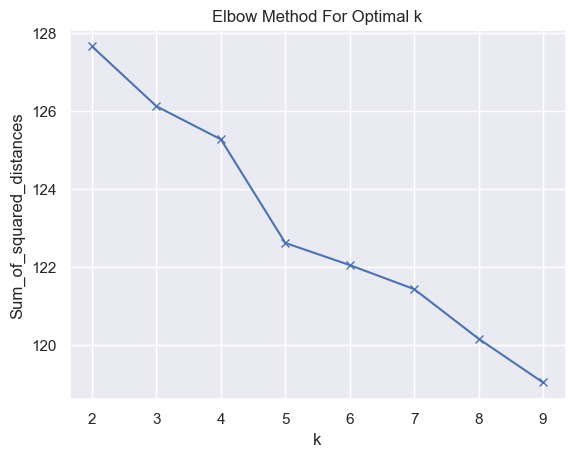

In [10]:
plot_kmeans_elbow_chart(x_t_fid_vectorizer, 10)

In [11]:
true_k = 4
k_means_cluster_analysis(true_k, x_t_fid_vectorizer, titles)




Clusters ---------------------------------------------------------------------------4
1    72
2    53
3    53
0     6
Name: cluster, dtype: int64


Cluster ---------------------------------------------------------------------------0
Degustando Puerto Rico Restaurant Week (1-12 de junio de 2022)
Restaurant Spotlight: Antillano
Restaurantes italianos auténticos en San Juan
Los 7 restaurantes nuevos del Puerto Rico Restaurant Week
7 restaurantes fuera del área metro durante Puerto Rico Restaurant Week
7 restaurantes frente al mar que debes probar durante Puerto Rico Restaurant Week


Cluster ---------------------------------------------------------------------------1
Lugares para alquilar un catamarán en Puerto Rico
9 actividades para hacer en Guánica, el pueblo del eterno verano
Venues únicos para alquilar en tu próxima actividad
Siete lugares para visitar en Salinas
5 tours de ron en la isla que no debes perderte
Siete fincas locales que ofrecen servicio de delivery
De Roadtrip por Po

In [28]:
data = pd.read_csv('./data/text-similarity-documents.csv')
titles = [t for t in df['title']]
    

text-similarity-ada-001


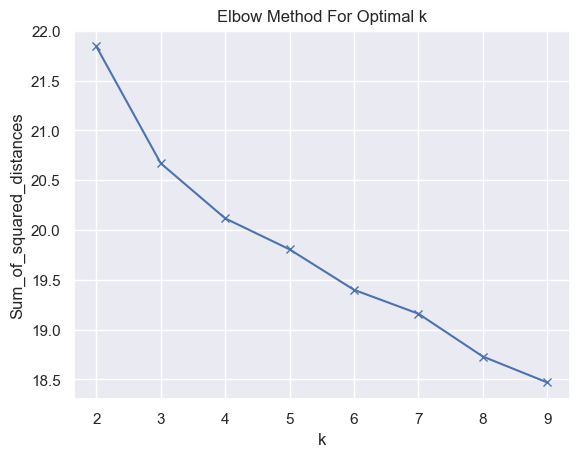

text-similarity-babbage-001


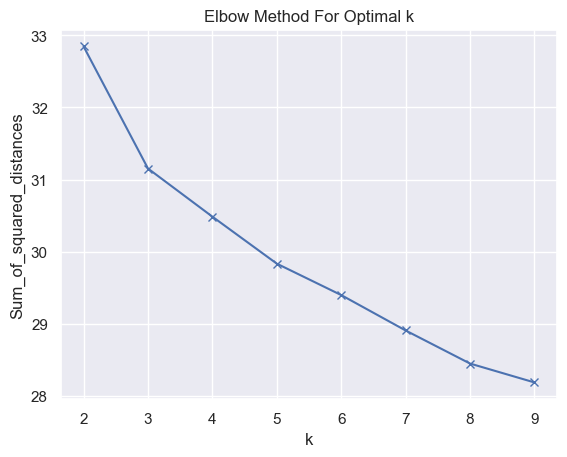

text-similarity-curie-001


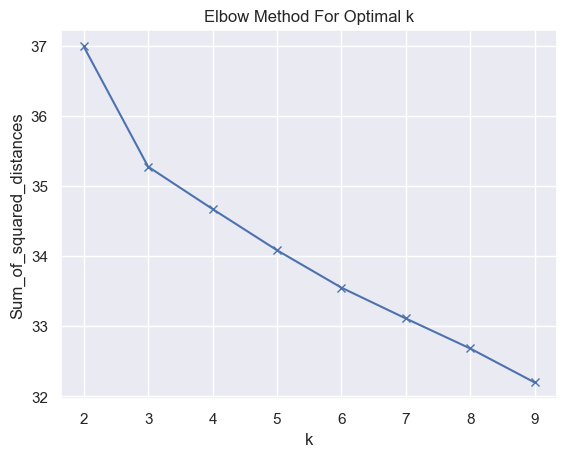

text-similarity-davinci-001


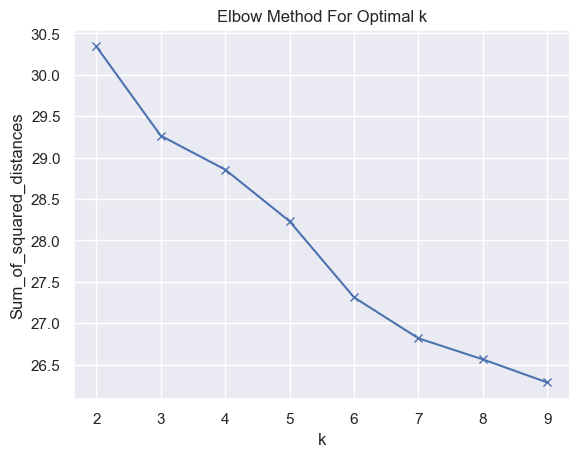

In [36]:
engines = [f"text-similarity-{e}-001" for e in ["ada", "babbage", "curie", "davinci"]]

for e in engines:
    current_embedding = pd.read_csv(f'./data/{e}.csv')
    print(e)
    plot_kmeans_elbow_chart(current_embedding, 10)
    

In [ ]:
for e in engines:
    current_embedding = pd.read_csv(f'./data/{e}.csv')
    print(e)
    plot_kmeans_elbow_chart(current_embedding, 10)
    

In [42]:
for e in engines:
    
    print(f'{e} starts ------------------------------------------------------------------------------------------------------------------------------------------')
    current_embedding = pd.read_csv(f'./data/{e}.csv')    
    ti = titles[0:len(current_embedding)]
    k_means_cluster_analysis(3, current_embedding.values, ti)
    print(f'{e} ends ------------------------------------------------------------------------------------------------------------------------------------------')


text-similarity-ada-001 starts ------------------------------------------------------------------------------------------------------------------------------------------


Clusters ---------------------------------------------------------------------------3
2    88
1    69
0    27
Name: cluster, dtype: int64


Cluster ---------------------------------------------------------------------------0
9 eventos de Halloween que no te puedes perder esta semana
¡Día del Perro en Puerto Rico! Los 6 jangueos para celebrar con tu mascota
Distrito T-Mobile celebrará su primer aniversario por todo lo alto y esto es lo que debes saber
Eventos de navidad en Puerto Rico: 2021
Qué hacer y comer con $30 en la Calle Loíza
Un Verano Viewing Party: Lo que debes saber antes de llegar
Lugares donde celebrar la víspera de año nuevo
Trap Kitty Festival: Young Miko convoca a sus gatitxs a un evento masivo en Mayagüez
Cierran fila para comprar taquillas para el concierto de Bad Bunny
Casa BACARDÍ Términos y Condic

1024
